# Лабораторная работа №1. Python и визуалилизация данных#
#### Заполните код в клетках (где написано "Ваш код здесь")

In [565]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import matplotlib.patches as patches
from collections import Counter
%matplotlib inline

### Считайте данные из файла titanic_train.csv в память в виде объекта Pandas.DataFrame #

In [566]:
#ваш код здесь
df = pd.read_csv("titanic_train.csv")

##### 1. Сколько мужчин / женщин находилось на борту? 

Напишите код и правильный вариант ответа

1) 412 мужчин и 479 женщин

2) 314 мужчин и 577 женщин

3) 479 мужчин и 412 женщин

4) 577 мужчин и 314 женщин

In [567]:
#ваш код здесь
#print(len(titanic_data.Sex.values))
print('Мужчин - ',df.loc[df['Sex'] == 'male'].PassengerId.count())
print('Женщин - ',df.loc[df['Sex'] == 'female'].PassengerId.count())
print('Вариант ответа - 4')

Мужчин -  577
Женщин -  314
Вариант ответа - 4


#####  2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

Напишите код и правильный вариант ответа

1) 104

2) 108

3) 112

4) 125

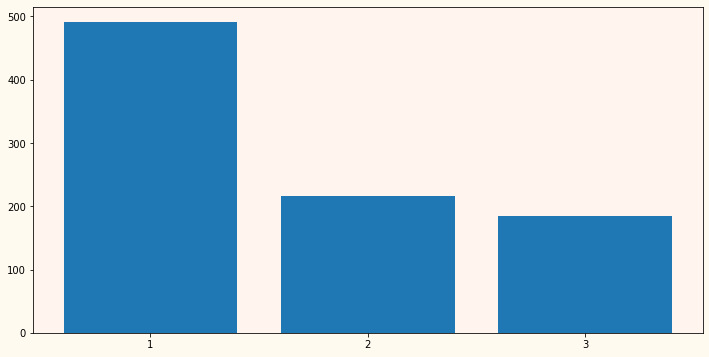

In [568]:
#ваш код здесь
total_pclass = dict(Counter(df.Pclass))               #всего значений
x = np.arange(1,len(total_pclass)+1)                  #ось X
y = total_pclass.values()                             #ось Y

fig, ax = plt.subplots()                              #Иницализация графика
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) #Установка целых чисел оси X
ax.bar(x, y)                                          #Инициализация осей

ax.set_facecolor('seashell')                          #Цвет гистограммы
fig.set_facecolor('floralwhite')                      #Цвет фона
fig.set_figwidth(12)                                  #ширина фигуры
fig.set_figheight(6)                                  #высота фигуры

plt.show()

#####  3. Каковы медиана и стандартное отклонение платежей (Fare)? 

Напишите код и правильный вариант ответа

1) Медиана – 14.45, стандартное отклонение – 49.69

2) Медиана – 15.1, стандартное отклонение – 12.15

3) Медиана – 13.15, стандартное отклонение – 35.3

4) Медиана – 17.43, стандартное отклонение – 39.1

In [569]:
#ваш код здесь


##### 4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

Напишите код и правильный вариант ответа

1) 22.7% среди молодых и 40.6% среди старых

2) 40.6% среди молодых и 22.7% среди старых

3) 35.3% среди молодых и 27.4% среди старых

4) 27.4% среди молодых и 35.3% среди старых

In [570]:
#ваш код здесь

##### 5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

Напишите код и правильный вариант ответа

1) 30.2% среди мужчин и 46.2% среди женщин

2) 35.7% среди мужчин и 74.2% среди женщин

3) 21.1% среди мужчин и 46.2% среди женщин

4) 18.9% среди мужчин и 74.2% среди женщин


In [571]:
#ваш код здесь

##### 6. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

Напишите код и правильный вариант ответа

1) Да

2) Нет


In [572]:
#ваш код здесь


##### 7. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

Напишите код и правильный вариант ответа

1) В среднем мужчины 1-го класса старше 40 лет

2) В среднем женщины 1-го класса старше 40 лет

3) Мужчины всех классов в среднем старше женщин того же класса

4) В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [573]:
#ваш код здесь

##### 8. Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix Pandas или pairplot Seaborn).

Напишите код и визуализируйте

In [574]:
#ваш код здесь

##### 9. Как плата за билет (Fare) зависит от класса каюты (Pclass)? Постройте boxplot.

Напишите код и визуализируйте

In [575]:
#ваш код здесь

##### 10. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.

Напишите код и визуализируйте

In [576]:
#ваш код здесь

##### 11. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.

Напишите код и визуализируйте

In [577]:
#ваш код здесь

##### 12. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.

Напишите код и визуализируйте

In [578]:
#ваш код здесь